
# **Text Classification: Topic Modeling LDA​**


## Overview

We will learn the about the most widely used text classification model LDA through:

Introduction to LDA model (What and how does LDA model work)

Implementation of LDA model wiht Python:
- Activity 1: Text representation
- Activity 2: Training LDA model

Analysising your results
- Activity 3: Visualisation of text classification



---



# **Overview of Latent Dirichlet Allocation (LDA)**

![LDA.jpg](https://media.springernature.com/full/springer-static/image/chp%3A10.1007%2F978-981-19-3035-5_29/MediaObjects/520032_1_En_29_Fig3_HTML.png?as=webp)

# **Implementation of LDA**
---
### Steps
- Loading data and visualise data
- Prepare data for LDA analysis
- Training LDA model
- Analysing LDA model results

---

### Dataset
The datasets we will use today: BBC News Datasets (D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006. [PDF].)

The dataset was retrieved from BBC News, and has been widely used in machine-learning and traing text-classification models.
These datasets are made available for non-commercial and research purposes only.

The dataset contains 2225 news articles published between 2004-2005 on the BBC news website. Each article is labeled with one of the five topics: Politics, Business, Technology, Entertainment and Sport.


Source of dataset: 
https://huggingface.co/datasets/SetFit/bbc-news

Other dataset to try:
https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail?resource=download



---



# Import Python libriary

In [1]:
!pip install gensim
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kraken 6.0.3.dev3 requires numpy~=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable


# Loading and visualised your data







In [67]:
import zipfile
import pandas as pd
import os

# Open the zip file
!wget https://github.com/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/raw/refs/heads/main/Task1-LDA-spam-mail/LDA.zip

# Read the CSV file into a pandas DataFrame
data1 = "BBCnews_data.csv"
data2 = "cnnnews_data.csv"
data = pd.read_csv(data2)

In [68]:
# Print name of each column and numer of data points
print(data.info(verbose=True), "\n")

# Print the first 5 rows in the dataset
print(">>> The first 5 rows in the dataset")
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11490 non-null  object
 1   article     11490 non-null  object
 2   highlights  11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB
None 

>>> The first 5 rows in the dataset
                                         id  \
0  92c514c913c0bdfe25341af9fd72b29db544099b   
1  2003841c7dc0e7c5b1a248f9cd536d727f27a45a   
2  91b7d2311527f5c2b63a65ca98d21d9c92485149   
3  caabf9cbdf96eb1410295a673e953d304391bfbb   
4  3da746a7d9afcaa659088c8366ef6347fe6b53ea   

                                             article  \
0  Ever noticed how plane seats appear to be gett...   
1  A drunk teenage boy had to be rescued by secur...   
2  Dougie Freedman is on the verge of agreeing a ...   
3  Liverpool target Neto is also wanted by PSG an...   
4  Bruce Jenner will break his silence in a 

# Visualise data with wordcloud

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:499: DeprecationWa

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else


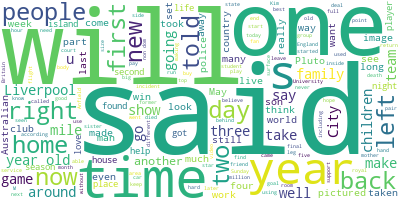

In [69]:
# Import the wordcloud library
from wordcloud import WordCloud

# Randomly select 100 articles and join them together (for faster processing)
long_string = ','.join(list(data['article'].sample(100).values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()



---



# Prepare data for LDA analysis

Before we can use the LDA model, data needs to be processed and transformed in a format that can be use as an input for LAD model, these steps inclues:

1. Tokenize the text
2. Remove stopwords
3. Convert the tokenized object into a corpus and dictionary

## 01 - Tokenization

Tokenisers work by splitting text into smaller components, or the unit for analysis. 

- For example, an article can be split into sentences, or words, depending on the purpose of your analysis.

This is usually done by identifyin the "separator"  or "delimiter" in the data. 

- For example, the " "(blank space) between words in a sentence, or the ","(comma) or "." (period)

In our case, as we are not interested in analysing punctuation, we will first remove punctuation marks and choose " " as the diameter to tokenise or data.

In [70]:
# Load the Regex (regular expression) library to clean up the data
import re

# Remove punctuation
article = data['article']
cleaned_article = article.map(lambda x: re.sub('[,\.!?]', '', x)) # Search for each row of data, and replace "[,\.!?]", with "" (nothing)
cleaned_article = cleaned_article.map(lambda x: x.lower()) # Make everything letter lower-case.

<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
/var/folders/c1/0n_49f8j32g53wsfv_c9jv2w0000gn/T/ipykernel_51621/3362886169.py:6: DeprecationWarning: invalid escape sequence '\.'
  cleaned_article = article.map(lambda x: re.sub('[,\.!?]', '', x)) # Search for each row of data, and replace "[,\.!?]", with "" (nothing)


In [71]:
print("Original article:")
print(article[0], "\n")
print("Article after removing punctuation:")
print(cleaned_article[0])

Original article:
Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee. 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than f

In [72]:
# Tokenization 
from nltk.tokenize import sent_tokenize, word_tokenize

text = "a set of words that is complete in itself, typically containing a subject and predicate. A sentence conveys a statement, question, exclamation, or command, and consisting of a main clause and sometimes one or more subordinate clauses."#example_sentence 
print("Use sent_tokenize to split data into sentences")
print(sent_tokenize(text)) # nltk.tokenize.sent_tokenize(text, language='english')

print("Use word_tokenize to split data into sentences")
print(word_tokenize(text))

Use sent_tokenize to split data into sentences
['a set of words that is complete in itself, typically containing a subject and predicate.', 'A sentence conveys a statement, question, exclamation, or command, and consisting of a main clause and sometimes one or more subordinate clauses.']
Use word_tokenize to split data into sentences
['a', 'set', 'of', 'words', 'that', 'is', 'complete', 'in', 'itself', ',', 'typically', 'containing', 'a', 'subject', 'and', 'predicate', '.', 'A', 'sentence', 'conveys', 'a', 'statement', ',', 'question', ',', 'exclamation', ',', 'or', 'command', ',', 'and', 'consisting', 'of', 'a', 'main', 'clause', 'and', 'sometimes', 'one', 'or', 'more', 'subordinate', 'clauses', '.']


> Question: What's the difference between tokeniser and split?

In [76]:
print(word_tokenize(text))
print(text.split(" "))

['a', 'set', 'of', 'words', 'that', 'is', 'complete', 'in', 'itself', ',', 'typically', 'containing', 'a', 'subject', 'and', 'predicate', '.', 'A', 'sentence', 'conveys', 'a', 'statement', ',', 'question', ',', 'exclamation', ',', 'or', 'command', ',', 'and', 'consisting', 'of', 'a', 'main', 'clause', 'and', 'sometimes', 'one', 'or', 'more', 'subordinate', 'clauses', '.']
['a', 'set', 'of', 'words', 'that', 'is', 'complete', 'in', 'itself,', 'typically', 'containing', 'a', 'subject', 'and', 'predicate.', 'A', 'sentence', 'conveys', 'a', 'statement,', 'question,', 'exclamation,', 'or', 'command,', 'and', 'consisting', 'of', 'a', 'main', 'clause', 'and', 'sometimes', 'one', 'or', 'more', 'subordinate', 'clauses.']


Now let's use the method above to tokenise the dataset "news["cleaned_article"]"

In [77]:
tokenised_articles = [word_tokenize(article) for article in cleaned_article]

### 02- Remove stopwords

Stop words are commonly used words. In English, for example, "the" , "is", "what", are all stopwords.

As these words do not carry much information of meaning in a sentence, they are usually excluded from the data to achieve a better analysis result.

In [78]:
import gensim    # open source Python library for text processing
from gensim.utils import simple_preprocess
import nltk      # natual language processing tool kit
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
customised_stopwords = ['from', 'mr', 'edu', 'use'] # You can add your own stopwords
stop_words.extend(customised_stopwords)

# function for removing stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

tokenised_articles_no_stopwords = remove_stopwords(tokenised_articles)

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [81]:
print(cleaned_article[0], "\n") # Original article
print(tokenised_articles[0], "\n") # Tokenised article
print(tokenised_articles_no_stopwords[0], "\n") # Tokenised article without stopwords

ever noticed how plane seats appear to be getting smaller and smaller with increasing numbers of people taking to the skies some experts are questioning if having such packed out planes is putting passengers at risk they say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger more than squabbling over the arm rest shrinking space on planes putting our health and safety in danger this week a us consumer advisory group set up by the department of transportation said at a public hearing that while the government is happy to set standards for animals flying on planes it doesn't stipulate a minimum amount of space for humans 'in a world where animals have more rights to space and food than humans' said charlie leocha consumer representative on the committee 'it is time that the dot and faa take a stand for humane treatment of passengers' but could crowding on planes lead to more serious issues than fighting for space in the overhea

### 03- Text representation: Bag of words (BOW)

The last step of text processing is turning textual data into numerical format. In our case, we want to turn a news article into a series of numbers that represent the article. 

One of the most common way to do this is "bag-of-words" or BOW. 

It works by creating a vocabulary of all unique words in a collection of documents and then representing each document as a vector of word counts. 

For example:
- Tokens: {banana, apple, walk, on, the, street, dog}
- Sentence 1 vector: {banana: 2, apple: 1, walk: 1, on: 1, the: 1, street: 1, dog: 1}
- Sentence 2 vector: {banana: 1, apple: 0, walk: 1, on: 1, the: 2, street: 1, dog: 0}


This represenation ignore the order and grammatical relationship between words, and simply count the number of appearance (frequency) of a given word in the text. It is commonly used in text classification or compare similarity between documents.

In general, this model works better on longer 

In [83]:
import gensim.corpora as corpora

# Create Dictionary
# This assign an index to each token (word)
id2word = corpora.Dictionary(tokenised_articles_no_stopwords)

for index in id2word.keys()[:10]:
    print(index, id2word[index])

0 administration
1 advisory
2 aeroplanes
3 air
4 airlines
5 airways
6 amount
7 animals
8 appear
9 arm


In [84]:
# turn each article into "Bag of words"
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]

# View
print(corpus[0])
print(corpus[1])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 7), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 11), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 3), (77, 1), (78, 5), (79, 2), (80, 6), (81, 2), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 5), (98, 5), (99, 1), (100, 2), (101, 1), (102, 2), (103, 1), (104, 2), (105, 6), (106, 1), (107, 1), (108, 1), (109, 2), (110, 1)



---



# Train LDA model

https://radimrehurek.com/gensim/models/ldamodel.html

In [85]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"said" + 0.005*"one" + 0.004*"would" + 0.004*"year" + 0.003*"also" + '
  '0.003*"last" + 0.003*"people" + 0.003*"first" + 0.003*"two" + '
  '0.003*"could"'),
 (1,
  '0.011*"said" + 0.005*"one" + 0.004*"year" + 0.003*"last" + 0.003*"time" + '
  '0.003*"also" + 0.003*"would" + 0.003*"new" + 0.003*"two" + 0.003*"old"'),
 (2,
  '0.009*"said" + 0.006*"one" + 0.004*"year" + 0.004*"would" + 0.004*"two" + '
  '0.003*"time" + 0.003*"first" + 0.003*"also" + 0.003*"last" + '
  '0.003*"people"'),
 (3,
  '0.009*"said" + 0.005*"year" + 0.005*"one" + 0.003*"people" + 0.003*"two" + '
  '0.003*"also" + 0.003*"told" + 0.003*"old" + 0.003*"last" + 0.003*"would"'),
 (4,
  '0.009*"said" + 0.004*"year" + 0.004*"would" + 0.003*"also" + 0.003*"one" + '
  '0.003*"police" + 0.003*"two" + 0.003*"first" + 0.003*"people" + '
  '0.003*"last"')]


# Analyse the trained LDA model

In [86]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.007495  0.000153       1        1  27.098372
2      0.003836  0.003176       2        1  18.778913
0      0.003225 -0.005423       3        1  18.241640
1     -0.001079 -0.001263       4        1  18.239327
4      0.001514  0.003358       5        1  17.641749, topic_info=       Term          Freq         Total Category  logprob  loglift
95     said  40758.000000  40758.000000  Default  30.0000  30.0000
73      one  19681.000000  19681.000000  Default  29.0000  29.0000
222   would  14632.000000  14632.000000  Default  28.0000  28.0000
323  league   6143.000000   6143.000000  Default  27.0000  27.0000
181     man   6241.000000   6241.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
503    left   1681.386906  10177.136417   Topic5  -6.1140  -0.0656
508    like   1489.798611   8725.407206   Topic5  -6.2350  -0.0327
73      one   2461.738398  19681.120088   Topic5  -5.7328  -0.3439
650     get   1321.343731   7743.125703   Topic5  -6.3550  -0.0333
602    told   1377.904275  10599.370528   Topic5  -6.3131  -0.3053

[478 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
77894      4  0.726391     aborts
267        1  0.336919  according
267        2  0.148429  according
267        3  0.186287  according
267        4  0.183282  according
...      ...       ...        ...
60200      4  0.553369       zaur
69327      1  0.172825         ze
69327      2  0.172825         ze
69327      3  0.518475         ze
69327      4  0.172825         ze

[1402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

## Tuning LDA model and Visualisation

In [106]:
id2word = corpora.Dictionary(tokenised_articles_no_stopwords)
id2word.filter_extremes(
#   no_below=5,    # Keep tokens which are in at least 5 documents
    no_above=0.5,  # Keep tokens which are in no more than 50% of the documents (fraction)
    keep_n=10000  # Keep only the first 100,000 most frequent tokens (optional, for memory control)
)
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]

from pprint import pprint


# Build LDA model
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 6, 
                                           random_state=100,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# Print the Keyword in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

[(0,
  '0.017*"police" + 0.009*"told" + 0.008*"court" + 0.007*"old" + '
  '0.006*"family" + 0.006*"man" + 0.006*"home" + 0.005*"death" + 0.005*"found" '
  '+ 0.005*"left"'),
 (1,
  '0.010*"league" + 0.009*"season" + 0.008*"team" + 0.007*"game" + '
  '0.007*"first" + 0.007*"club" + 0.006*"back" + 0.005*"win" + 0.005*"united" '
  '+ 0.005*"final"'),
 (2,
  '0.006*"new" + 0.005*"water" + 0.005*"around" + 0.004*"years" + '
  '0.004*"could" + 0.004*"found" + 0.004*"million" + 0.004*"used" + '
  '0.004*"per" + 0.004*"people"'),
 (3,
  '0.010*"people" + 0.006*"school" + 0.006*"could" + 0.006*"children" + '
  '0.006*"women" + 0.005*"says" + 0.005*"years" + 0.005*"told" + 0.004*"get" + '
  '0.004*"life"'),
 (4,
  '0.008*"people" + 0.007*"labour" + 0.007*"government" + 0.007*"us" + '
  '0.006*"country" + 0.006*"party" + 0.006*"president" + 0.005*"leader" + '
  '0.005*"minister" + 0.005*"state"'),
 (5,
  '0.006*"new" + 0.006*"old" + 0.006*"day" + 0.006*"like" + 0.006*"first" + '
  '0.005*"show" +

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.173443  0.121053       1        1  19.659154
0      0.016139 -0.173837       2        1  19.507445
5     -0.101938 -0.055315       3        1  17.503486
2      0.043683  0.044554       4        1  16.100297
3      0.048633 -0.047419       5        1  15.275528
4      0.166926  0.110963       6        1  11.954091, topic_info=               Term          Freq         Total Category  logprob  loglift
144          police  10557.000000  10557.000000  Default  30.0000  30.0000
248          league   6318.000000   6318.000000  Default  29.0000  29.0000
274          season   6072.000000   6072.000000  Default  28.0000  28.0000
866           court   5044.000000   5044.000000  Default  27.0000  27.0000
761            game   4748.000000   4748.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
608             per   1415.001234   4879.205207   Topic6  -5.5961   0.8862
167           today   1225.801475   3416.749038   Topic6  -5.7396   1.0990
655             cnn   1103.563321   2388.606968   Topic6  -5.8447   1.3519
1045  international   1078.891126   2497.223611   Topic6  -5.8673   1.2849
17            could   1100.008142  10707.129250   Topic6  -5.8479  -0.1515

[467 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
203       1  0.021143  according
203       2  0.487502  according
203       3  0.036850  according
203       4  0.193309  according
203       5  0.108736  according
...     ...       ...        ...
839       2  0.207859      years
839       3  0.175853      years
839       4  0.211446      years
839       5  0.219172      years
839       6  0.072383      years

[1092 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 6, 3, 4, 5])

In [104]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    topic = []
    prop= []
    keywords = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic.append(int(topic_num))
                prop.append(round(prop_topic,4))
                keywords.append(topic_keywords)
            else:
                break
    sent_topics_df['Dominant_Topic'] = topic
    sent_topics_df['Perc_Contribution'] =prop
    sent_topics_df['Topic_Keywords']=keywords
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokenised_articles_no_stopwords)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
 

In [105]:
df_dominant_topic.head(10)

,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,0,4,0.4228,"one, new, also, per, said, years, cent, people, found, around","[ever, noticed, plane, seats, appear, getting, smaller, smaller, increasing, numbers, people, ta..."
1,1,0,0.3903,"said, police, year, court, told, two, old, man, death, family","[drunk, teenage, boy, rescued, security, jumping, lions, enclosure, zoo, western, india, rahul, ..."
2,2,3,0.9719,"league, season, club, united, city, team, manchester, players, chelsea, premier","[dougie, freedman, verge, agreeing, new, two, year, deal, remain, nottingham, forest, freedman, ..."
3,3,3,0.7186,"league, season, club, united, city, team, manchester, players, chelsea, premier","[liverpool, target, neto, also, wanted, psg, clubs, spain, brendan, rodgers, faces, stiff, compe..."
4,4,0,0.4444,"said, police, year, court, told, two, old, man, death, family","[bruce, jenner, break, silence, two, hour, interview, diane, sawyer, later, month, former, olymp..."
5,5,0,0.5431,"said, police, year, court, told, two, old, man, death, family","[moment, crew, firefighters, struggled, haul, giant, pig, garden, swimming, pool, prize, porker,..."
6,6,2,0.4864,"said, would, people, us, last, country, government, party, president, also","[amount, time, people, spend, listening, bbc, radio, dropped, lowest, level, ever, corporation, ..."
7,7,1,0.5422,"said, would, one, like, year, get, time, old, people, family","[cnn, like, full, house, reunion, spinoff, got, dude, co, star, john, stamos, announced, monday,..."
8,8,5,0.5094,"first, second, back, time, game, two, win, one, goal, final","[pm, former, world, champion, ken, doherty, potted, final, black, extinguished, dream, reanne, e..."
9,9,0,0.6096,"said, police, year, court, told, two, old, man, death, family","[gang, six, men, jailed, total, years, convicted, string, sexual, offences, teenager, girls, off..."




---



# **Resources List**

**Tutorials**
Different ways to visualise results of LDA analysis:https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

